In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [2]:
data = pd.read_csv('./data/parkinsons_updrs.data.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5875 non-null   int64  
 1   subject#       5875 non-null   int64  
 2   age            5875 non-null   int64  
 3   sex            5875 non-null   int64  
 4   test_time      5875 non-null   float64
 5   motor_UPDRS    5875 non-null   float64
 6   total_UPDRS    5875 non-null   float64
 7   Jitter(%)      5875 non-null   float64
 8   Jitter(Abs)    5875 non-null   float64
 9   Jitter:RAP     5875 non-null   float64
 10  Jitter:PPQ5    5875 non-null   float64
 11  Jitter:DDP     5875 non-null   float64
 12  Shimmer        5875 non-null   float64
 13  Shimmer(dB)    5875 non-null   float64
 14  Shimmer:APQ3   5875 non-null   float64
 15  Shimmer:APQ5   5875 non-null   float64
 16  Shimmer:APQ11  5875 non-null   float64
 17  Shimmer:DDA    5875 non-null   float64
 18  NHR     

In [4]:
data.tail(10)

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5865,5865,42,61,0,106.76,25.029,36.029,0.00329,0.000024,0.00144,...,0.180,0.01020,0.01287,0.01776,0.03059,0.010377,24.873,0.51983,0.56668,0.113820
5866,5866,42,61,0,115.65,24.401,35.401,0.00448,0.000036,0.00208,...,0.213,0.01121,0.01475,0.01971,0.03362,0.035738,21.252,0.62957,0.57942,0.245670
5867,5867,42,61,0,121.63,23.979,34.979,0.00250,0.000019,0.00116,...,0.193,0.01104,0.01316,0.01987,0.03313,0.012234,20.661,0.47256,0.57177,0.139550
5868,5868,42,61,0,128.67,23.482,34.482,0.00249,0.000021,0.00066,...,0.142,0.00469,0.00773,0.01997,0.01406,0.007452,25.258,0.52976,0.54378,0.088268
5869,5869,42,61,0,136.80,22.908,33.908,0.00274,0.000021,0.00118,...,0.218,0.01375,0.01595,0.02108,0.04126,0.006058,23.935,0.45357,0.56142,0.134460
5870,5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.213670
5871,5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.126210
5872,5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.141570
5873,5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.142040
5874,5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.153360


In [5]:
data.columns

Index(['index', 'subject#', 'age', 'sex', 'test_time', 'motor_UPDRS',
       'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [6]:
data=data.loc[:,["index","subject#","age","sex","test_time","motor_UPDRS","total_UPDRS","Jitter(%)","Shimmer","NHR","HNR","RPDE","DFA","PPE"]]


array([[<Axes: title={'center': 'motor_UPDRS'}>,
        <Axes: title={'center': 'total_UPDRS'}>,
        <Axes: title={'center': 'Jitter(%)'}>],
       [<Axes: title={'center': 'Shimmer'}>,
        <Axes: title={'center': 'NHR'}>, <Axes: title={'center': 'HNR'}>],
       [<Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>]],
      dtype=object)

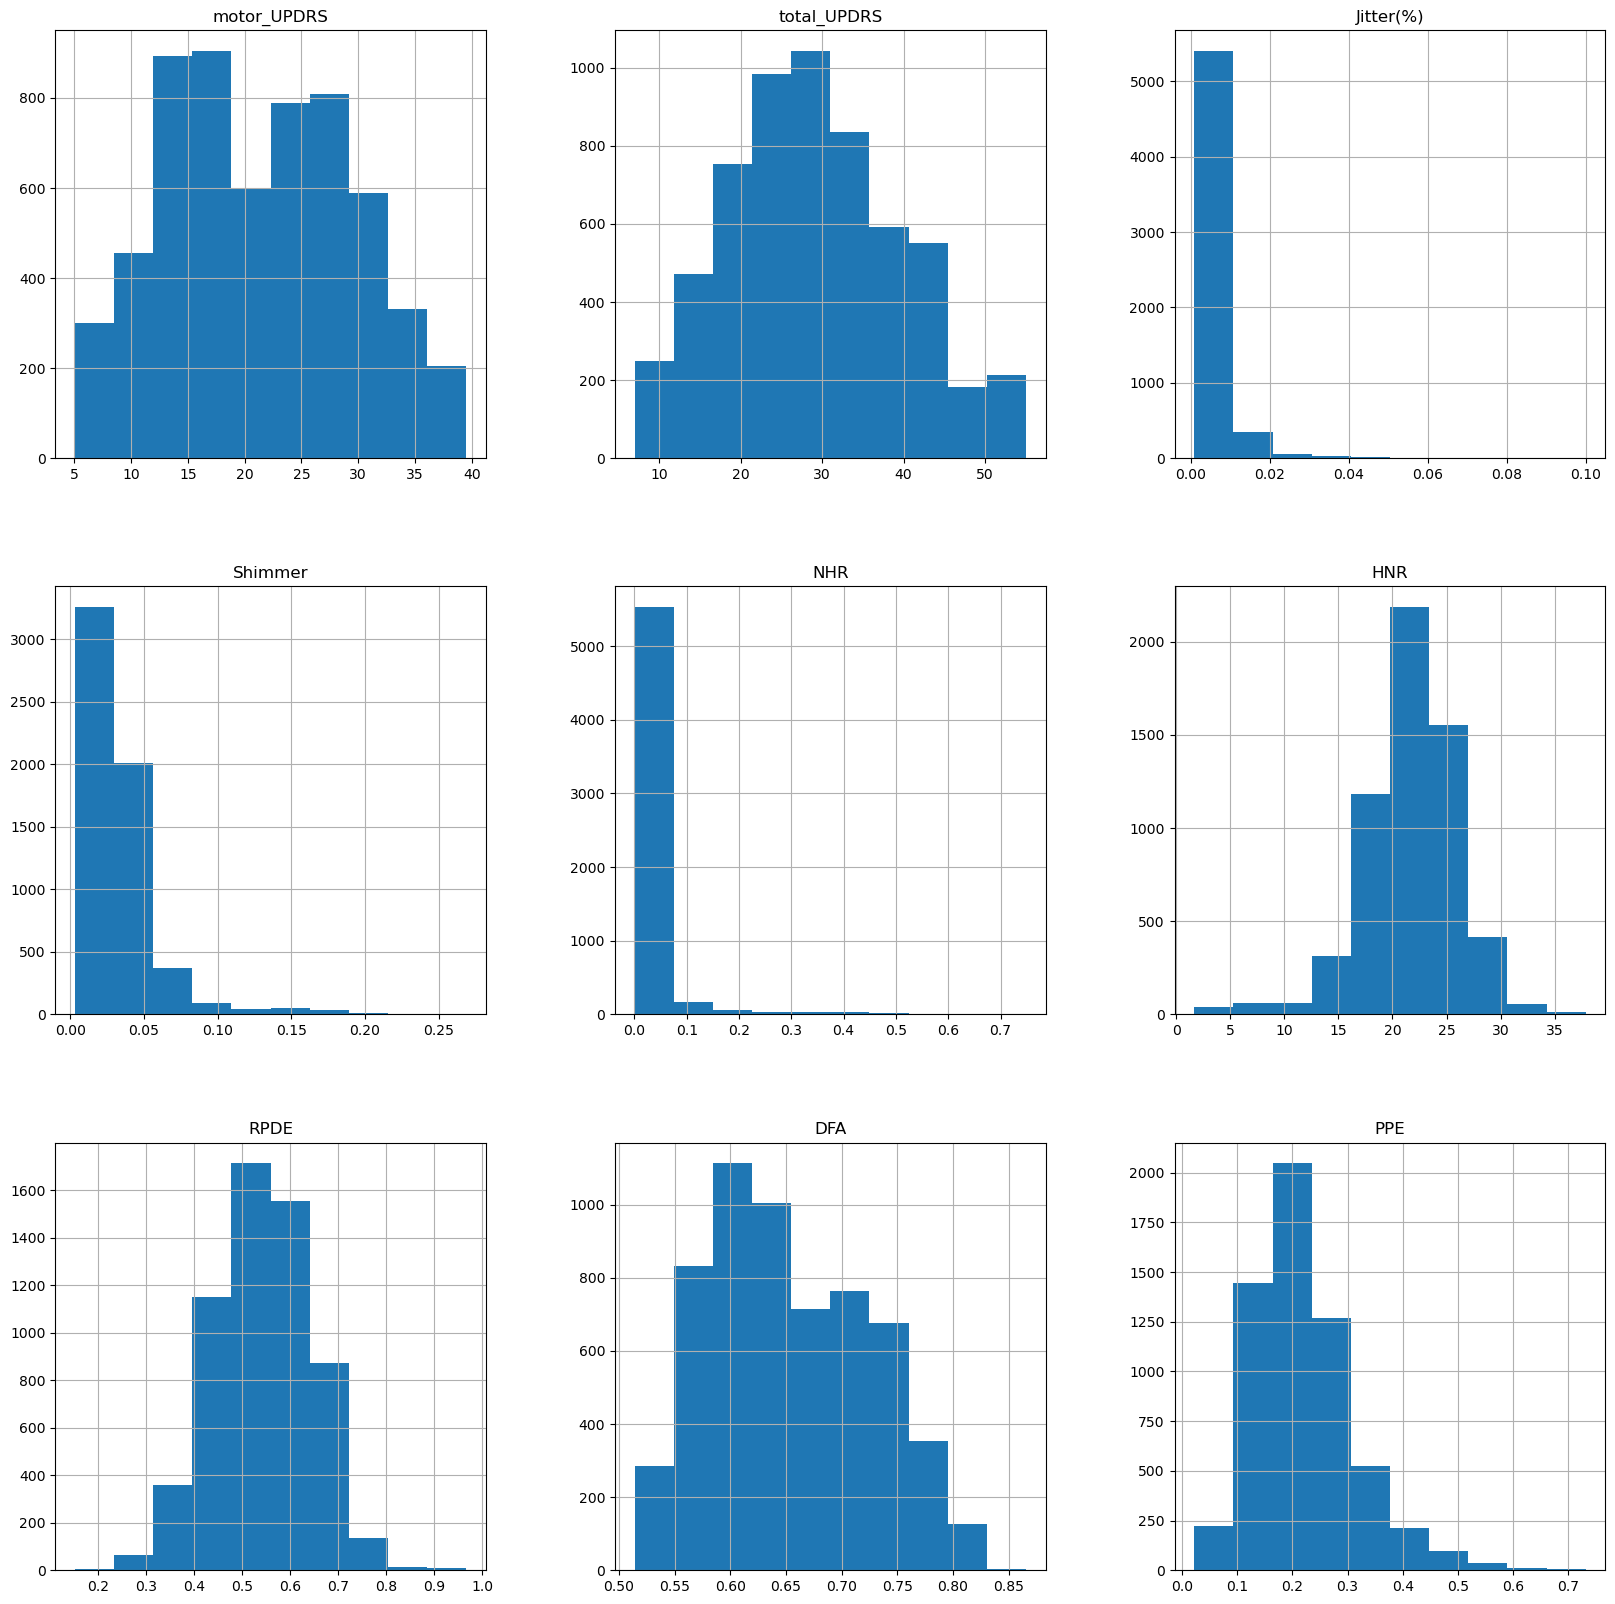

In [7]:
data.hist(column=['motor_UPDRS','total_UPDRS','Jitter(%)','Shimmer','NHR','HNR','RPDE','DFA','PPE'], figsize=(20,20))


In [8]:
data.isnull().sum()

index          0
subject#       0
age            0
sex            0
test_time      0
motor_UPDRS    0
total_UPDRS    0
Jitter(%)      0
Shimmer        0
NHR            0
HNR            0
RPDE           0
DFA            0
PPE            0
dtype: int64

In [9]:
# print all the columns of the dataframe
data.columns

Index(['index', 'subject#', 'age', 'sex', 'test_time', 'motor_UPDRS',
       'total_UPDRS', 'Jitter(%)', 'Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA',
       'PPE'],
      dtype='object')

In [10]:
# A1.
# Evaluate the interclass spread between the two classes in the dataset
# using the following features: motor_UPDRS, total_UPDRS, Jitter(%), Shimmer, NHR, HNR, RPDE, DFA, PPE


class1_data = np.array(data[data['subject#'] == 1])
class2_data = np.array(data[data['subject#'] == 2])

class1_centroid = np.mean(class1_data, axis=0)
class2_centroid = np.mean(class2_data, axis=0)

intraclass_spread_class1 = np.mean(np.linalg.norm(class1_data - class1_centroid, axis=1))
intraclass_spread_class2 = np.mean(np.linalg.norm(class2_data - class2_centroid, axis=1))


interclass_distance = np.linalg.norm(class1_centroid - class2_centroid)

print('Class 1 Centroid:', class1_centroid)
print('Class 2 Centroid:', class2_centroid)
print('Intraclass Spread Class 1:', intraclass_spread_class1)
print('Intraclass Spread Class 2:', intraclass_spread_class2)
print('Interclass Distance:', interclass_distance)


Class 1 Centroid: [7.40000000e+01 1.00000000e+00 7.20000000e+01 0.00000000e+00
 8.91769711e+01 3.18989329e+01 4.07332013e+01 4.28395973e-03
 2.14631544e-02 1.80755369e-02 2.54530268e+01 4.69117852e-01
 5.58248658e-01 1.95757416e-01]
Class 2 Centroid: [2.21000000e+02 2.00000000e+00 5.80000000e+01 0.00000000e+00
 9.03642662e+01 1.38125379e+01 1.62840138e+01 6.72068966e-03
 4.19637931e-02 2.50887586e-02 2.00790483e+01 5.20451172e-01
 7.55965586e-01 2.25953103e-01]
Intraclass Spread Class 1: 62.25574586614903
Intraclass Spread Class 2: 63.16584470883307
Interclass Distance: 150.86819705886583


In [11]:
# select one feature vector
feature_vector_1 = np.array(data['motor_UPDRS'])
feature_vector_1 = feature_vector_1.reshape(-1, 1)

feature_vector_2 = np.array(data['total_UPDRS'])
feature_vector_2 = feature_vector_2.reshape(-1, 1)


feature_vector_1.mean(axis=0)
feature_vector_2.mean(axis=0)

print('FV-1 >> Mean >> ', feature_vector_1.mean(axis=0))
print('FV-2 >> Mean >> ', feature_vector_2.mean(axis=0))

FV-1 >> Mean >>  [21.29622854]
FV-2 >> Mean >>  [29.01894228]


In [12]:
centroid_vector_1 = np.mean(feature_vector_1, axis=0)
centroid_vector_2 = np.mean(feature_vector_2, axis=0)

print('FV-1 >> Centroid >> ', centroid_vector_1)
print('FV-2 >> Centroid >> ', centroid_vector_2)

FV-1 >> Centroid >>  [21.29622854]
FV-2 >> Centroid >>  [29.01894228]


In [13]:
intraclass_spread_1 = np.mean(np.linalg.norm(feature_vector_1 - centroid_vector_1, axis=1))
intraclass_spread_2 = np.mean(np.linalg.norm(feature_vector_2 - centroid_vector_2, axis=1))

print('FV-1 >> Intraclass Spread >> ', intraclass_spread_1)
print('FV-2 >> Intraclass Spread >> ', intraclass_spread_2)

FV-1 >> Intraclass Spread >>  6.959782153792667
FV-2 >> Intraclass Spread >>  8.655948194564056


In [14]:
interclass_distance = np.linalg.norm(centroid_vector_1 - centroid_vector_2)

print('Interclass Distance:', interclass_distance)

Interclass Distance: 7.72271373617021


Mean >>  21.29622854468085
Variance >>  66.07396954958712


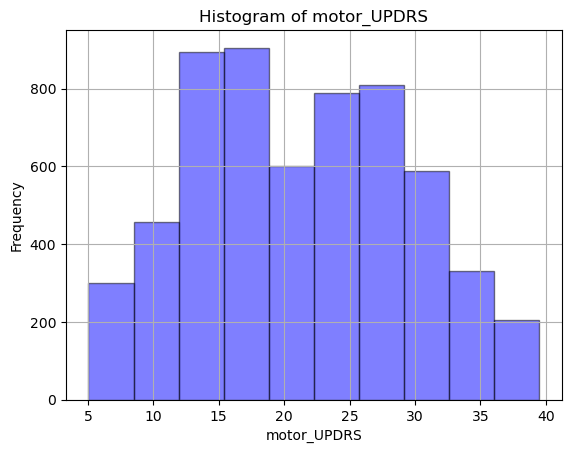

In [15]:
#A2.

# data

num_bins = 10
hist, bins = np.histogram(data['motor_UPDRS'], bins=num_bins)

mean = np.mean(data['motor_UPDRS'])
variance = np.var(data['motor_UPDRS'])

#plot histogram
plt.hist(data['motor_UPDRS'], bins=num_bins, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('motor_UPDRS')
plt.ylabel('Frequency')
plt.title('Histogram of motor_UPDRS')
plt.grid(True)


print("Mean >> ", mean)
print("Variance >> ", variance)

plt.show()

In [16]:
from scipy.spatial import distance

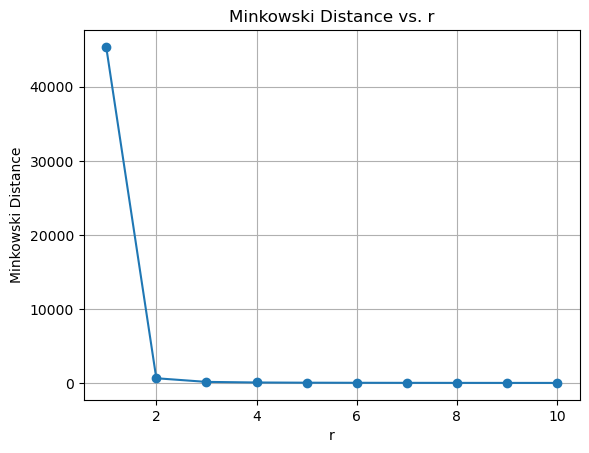

In [17]:
#A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 
# to 10. Make a plot of the distance and observe the nature of this graph.

vector1 = np.array(data['motor_UPDRS'])
vector2 = np.array(data['total_UPDRS'])

r_values = range(1, 11) # r = 1 to 10

distance = [distance.minkowski(vector1, vector2, p=r) for r in r_values]

plt.plot(r_values, distance, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()



In [18]:
from sklearn.model_selection import train_test_split



In [19]:

X = data.iloc[:, 2:13].values
y = data.iloc[:, 1].values

# X = data[['subject#', 'age', 'sex', 'test_time', 'Jitter(%)', 'Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']]
# y = data['motor_UPDRS']  # Change 'motor_UPDRS' to 'total_UPDRS' if needed

In [20]:
X

array([[ 72.     ,   0.     ,   5.6431 , ...,  21.64   ,   0.41888,
          0.54842],
       [ 72.     ,   0.     ,  12.666  , ...,  27.183  ,   0.43493,
          0.56477],
       [ 72.     ,   0.     ,  19.681  , ...,  23.047  ,   0.46222,
          0.54405],
       ...,
       [ 61.     ,   0.     , 156.82   , ...,  25.065  ,   0.47792,
          0.57888],
       [ 61.     ,   0.     , 163.73   , ...,  24.422  ,   0.56865,
          0.56327],
       [ 61.     ,   0.     , 170.73   , ...,  23.259  ,   0.58608,
          0.57077]])

In [21]:
y.shape

(5875,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
#  Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code 
# for help: 
# >>> import numpy as np 
# >>> from sklearn.neighbors import KNeighborsClassifier 
# >>> neigh = KNeighborsClassifier(n_neighbors=3) 
# >>> neigh.fit(X, y) 

In [24]:
#A5. 

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
#a6.
# Test the score

model.score(X_test, y_test)

0.9052750992626205

In [26]:
# A7. 
model.predict(X_test)

array([10, 38, 21, ..., 42, 38, 22], dtype=int64)

In [27]:
# A8. 
# Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 
# 11 and make an accuracy plot.


In [28]:
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
model_1.score(X_test, y_test)

0.9665343165059558

In [31]:
model_1.predict(X_test)

array([10,  9, 21, ..., 42, 38, 22], dtype=int64)

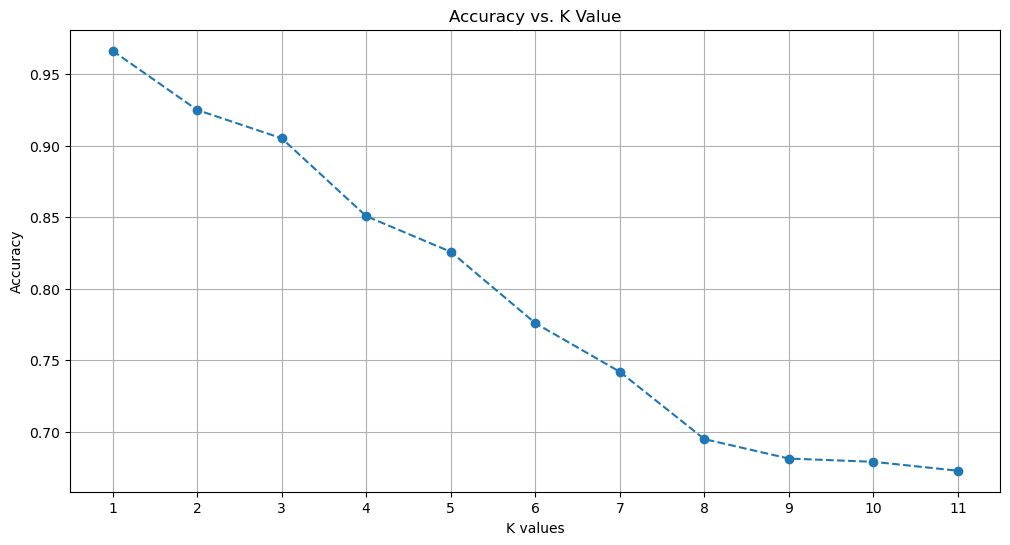

In [32]:
# Vary k from 1 to  11 and make an accuracy plot.
k_values = range(1, 12)

accu_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accu_scores.append(accuracy)

#plot the accuracy graph
plt.figure(figsize=(12, 6))
plt.plot(k_values, accu_scores, marker='o', linestyle='--')
plt.title('Accuracy vs. K Value')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# A9.
# Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
# other performance metrics such as precision, recall and F1-Score measures for both training and test 
# data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [38]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# precision, recall and F1-score for training data
precision_train = precision_score(y_train, y_train_pred, average='micro')
recall_train = recall_score(y_train, y_train_pred, average='micro')
f1_score_train = f1_score(y_train, y_train_pred, average='micro')

# precision, recall and F1-score for test data

precision_test = precision_score(y_test, y_test_pred, average='micro')
recall_test = recall_score(y_test, y_test_pred, average='micro')
f1_score_test = f1_score(y_test, y_test_pred, average='micro')

#print the confusion matrix and other metrics
print('Confusion Matrix - Training Data')
print(confusion_matrix_train)
print('Precision - Training Data', precision_train)
print('Recall - Training Data', recall_train)
print('F1 score - Training Data', f1_score_train)

print('Confusion Matrix - Test Data')
print(confusion_matrix_test)
print('Precision - Test Data', precision_test)
print('Recall - Test Data', recall_test)
print('F1 score - Test Data', f1_score_test)






Confusion Matrix - Training Data
[[ 93   0   0 ...   0   1   0]
 [  0  75   0 ...   0   0   0]
 [  0   0 101 ...   0   0   2]
 ...
 [  0   0   0 ... 100   0   0]
 [  2   0   0 ...   0 105   0]
 [  0   0   0 ...   0   0  62]]
Precision - Training Data 0.7816147859922179
Recall - Training Data 0.7816147859922179
F1 score - Training Data 0.7816147859922179
Confusion Matrix - Test Data
[[32  0  0 ...  0  1  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 3  0  0 ...  0 43  0]
 [ 0  0  2 ...  0  0 27]]
Precision - Test Data 0.6727169597277368
Recall - Test Data 0.6727169597277368
F1 score - Test Data 0.6727169597277368
